(395, 33)
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        

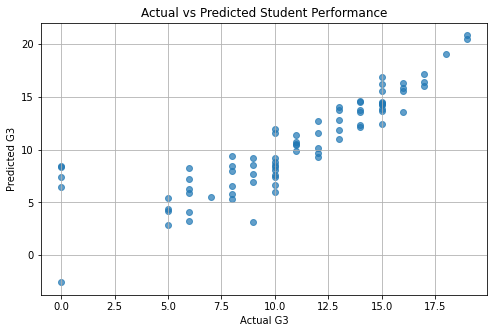

🎓 Predicted Final Grade (G3): 6.14


/home/vineet/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
# Student Performance Predictor

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Dataset (UCI student-mat.csv)
df = pd.read_csv("student-mat.csv", sep=';')

# Step 3: Initial Exploration
print(df.shape)
print(df.columns)
print(df.head())

# Step 4: Data Preprocessing
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 5: Feature Selection
# Target variable (y): Final Grade G3
# Predictors (X): Drop G3 from X
X = df_encoded.drop(["G3"], axis=1)
y = df_encoded["G3"]

first_row_values = X.iloc[0].tolist()
print("First row of X as list of values:")
print(first_row_values)

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Predictions
y_pred = model.predict(X_test)

# Step 9: Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Step 10: Visualization (Actual vs Predicted)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted Student Performance")
plt.grid()
plt.show()
# Replace with actual values in same order as df_encoded.columns (excluding G3)
custom_input = np.array([16, 4, 3, 2, 2, 0, 4, 3, 4, 1, 1, 3, 6, 5, 6, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0])  # Example values matching number of features
custom_input = custom_input.reshape(1, -1)

predicted_g3 = model.predict(custom_input)
print("🎓 Predicted Final Grade (G3):", round(predicted_g3[0], 2))


# Step 11: Save model
import pickle
with open("student_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Done ✅
# Next Steps:
# - Streamlit UI
# - GitHub repo upload
# - Optional: Gradio interface or deploy on Hugging Face
